In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
results = pd.read_csv("HyperParameterSearch_temp_train_size0.9.csv")
results.shape

(69984, 16)

In [5]:
results.describe().T

,count,mean,std,min,25%,50%,75%,max
k,69984.0,1.500000,5.000036e-01,1.000000,1.000000,1.500000,2.000000,2.000000
label_prior,69984.0,0.890000,6.976200e-02,0.800000,0.800000,0.900000,0.970000,0.970000
max_iter,69984.0,46.250000,3.416437e+01,10.000000,21.250000,37.500000,62.500000,100.000000
min_cluster_size,69984.0,133.333333,8.498427e+01,50.000000,50.000000,100.000000,250.000000,250.000000
min_prob,69984.0,0.017033,2.331402e-02,0.000100,0.000100,0.001000,0.050000,0.050000
model_prior_strength,69984.0,0.116667,6.236140e-02,0.050000,0.050000,0.100000,0.200000,0.200000
n_iter,69984.0,1.500000,5.000036e-01,1.000000,1.000000,1.500000,2.000000,2.000000
n_neighbors,69984.0,21.666667,6.236140e+00,15.000000,15.000000,20.000000,30.000000,30.000000
noise_prior,69984.0,0.200000,8.165024e-02,0.100000,0.100000,0.200000,0.300000,0.300000
tolerance,69984.0,0.000037,4.469931e-05,0.000001,0.000001,0.000010,0.000100,0.000100


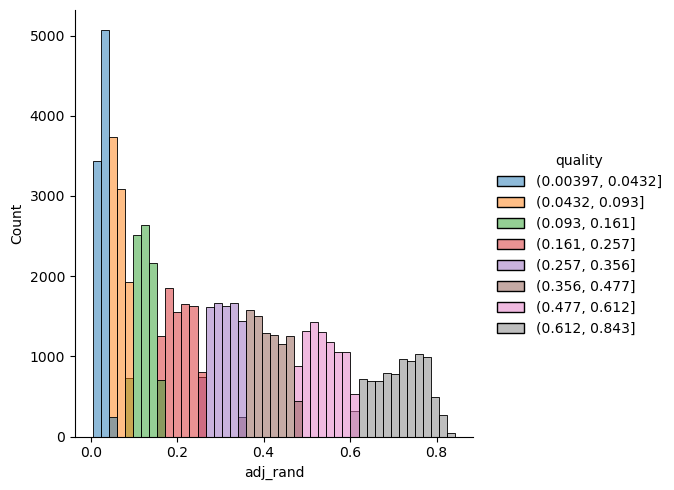

In [22]:
results['quality'] = pd.qcut(results.adj_rand, q=8)
sns.displot(data = results, x='adj_rand', hue='quality')

In [46]:
def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure(figsize=(16,4))
    ax = plt.gca()


    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        #ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), **kwds)
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), alpha=0.20, **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.grid()
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.2f')

    return fig

In [42]:
results = pd.read_csv("HyperParameterSearch_temp_train_size0.9.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


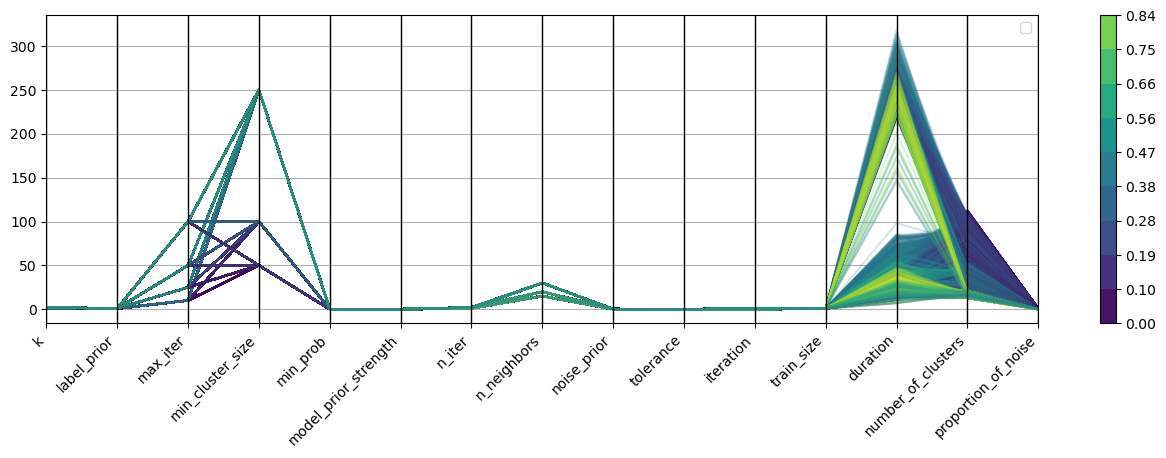

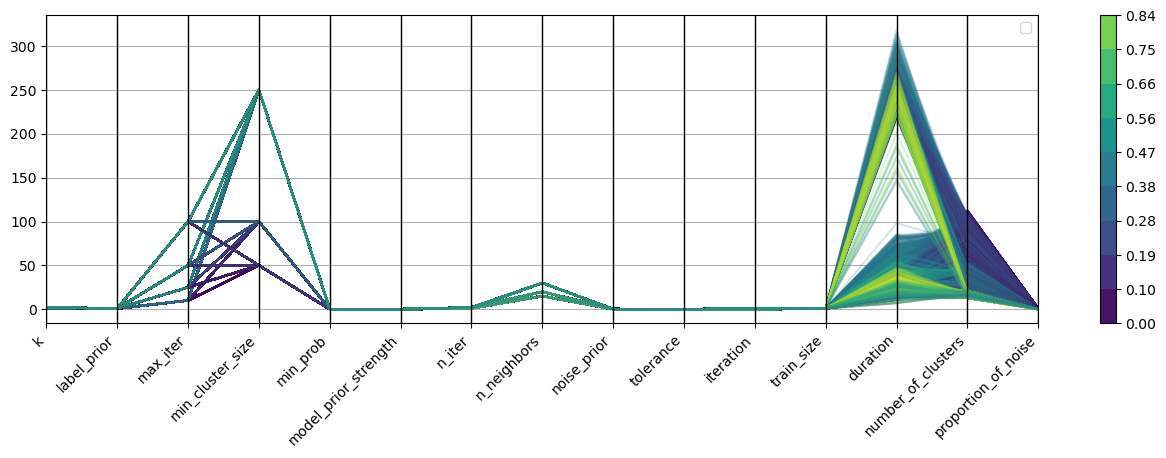

In [54]:
parallel_coordinates(results, "adj_rand")

In [58]:
sns.bo(results, x='n_neighbors', y='duration')


KeyboardInterrupt



Error in callback <function flush_figures at 0x7f4114cd23e0> (for post_execute):



KeyboardInterrupt



In [51]:
from sklearn import preprocessing

x = results.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns=results.columns)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


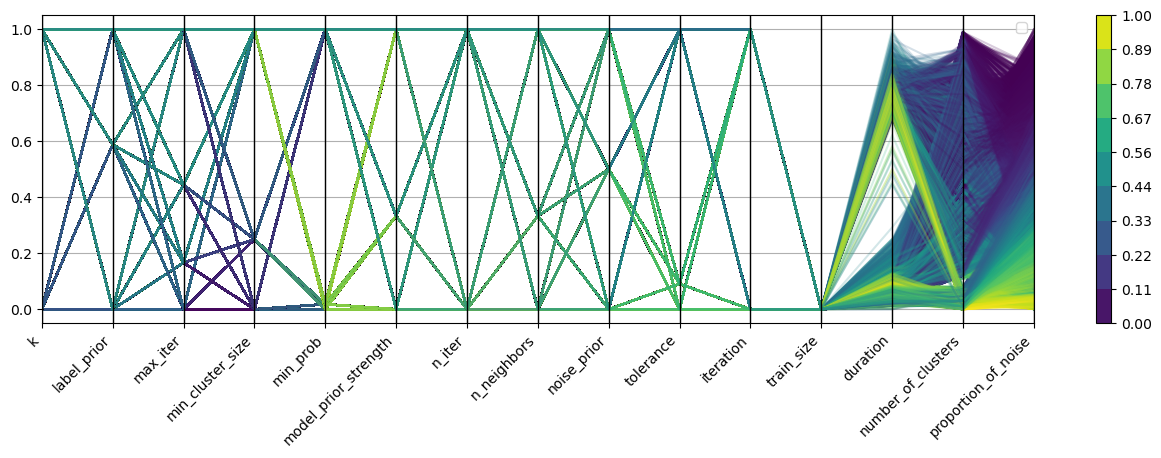

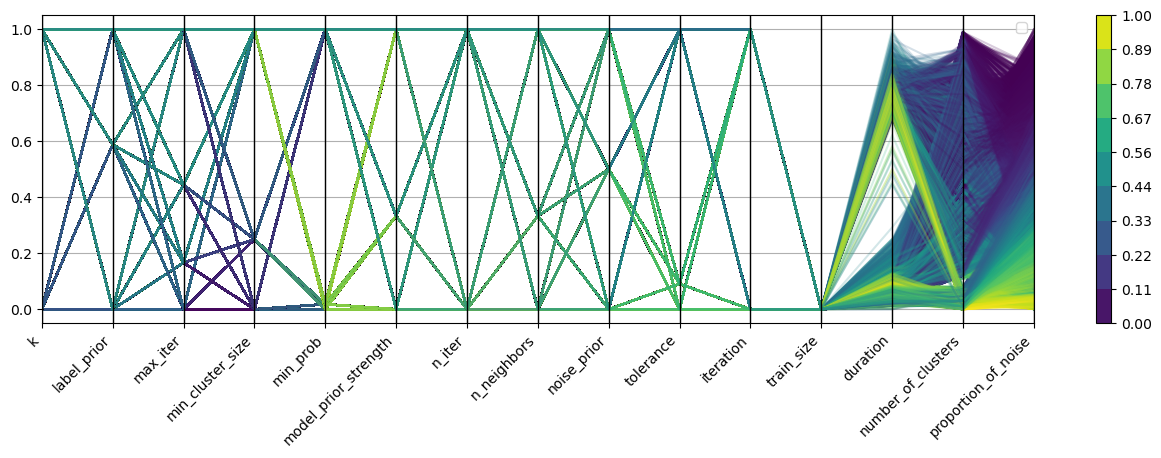

In [53]:
parallel_coordinates(df, "adj_rand")